In [7]:
# https://datahack.analyticsvidhya.com/contest/wns-analytics-wizard-2019/
import pandas as pd
import matplotlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from xgboost import plot_tree

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
import pprint
from sklearn.impute import SimpleImputer

In [9]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [312]:
test_file =      "/Users/raghugup/Downloads/wns_hackathon/test.csv"
item_data_file = "/Users/raghugup/Downloads/wns_hackathon/train_NA17Sgz/item_data.csv"
train_file =    "/Users/raghugup/Downloads/wns_hackathon/train_NA17Sgz/train.csv"
view_log_file = "/Users/raghugup/Downloads/wns_hackathon/train_NA17Sgz/view_log.csv"

In [313]:
testDF = pd.read_csv(test_file)
itemDataDF = pd.read_csv(item_data_file)
trainDF = pd.read_csv(train_file)
viewLogDF = pd.read_csv(view_log_file)

In [352]:
print(testDF.shape)
print(itemDataDF.shape)
print(trainDF.shape)
print(viewLogDF.shape)

(90675, 6)
(132761, 6)
(237609, 7)
(3118622, 5)


In [351]:
testDF.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [315]:
itemDataDF.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [56]:
viewLogDF.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [70]:
trainDF.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [349]:
viewLogDF.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [350]:
itemDataDF.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [86]:
trainDF.shape

(237609, 7)

In [346]:
len(set(trainDF['user_id']) - set(viewLogDF['user_id']))

0

In [348]:
len(set(viewLogDF['item_id']) - set(itemDataDF['item_id']))

101

In [345]:
len(set(viewLogDF['user_id']))

Series([], dtype: int64)


In [353]:
midTrainDF = pd.merge(trainDF, viewLogDF.drop_duplicates(subset=['user_id']), how='left', on = 'user_id')
print(midTrainDF.shape)
finalTrainDF = pd.merge(midTrainDF,itemDataDF, how='left', on = 'item_id')
print(finalTrainDF.shape)
finalDF.head()

(237609, 11)
(237609, 16)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-10-23 12:59:00,android,658178,122348,973.0,13.0,67.0,170.0,2874.0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-11 21:18:00,android,943856,53195,3008.0,11.0,51.0,220.0,8557.0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-10-18 12:02:00,android,342525,32155,3187.0,9.0,9.0,244.0,10412.0


In [320]:
finalTrainDF.columns

Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'is_click', 'server_time', 'device_type', 'session_id',
       'item_id'],
      dtype='object')

In [354]:
midTestDF = pd.merge(testDF, viewLogDF.drop_duplicates(subset=['user_id']), how='left', on = 'user_id')
print(midTestDF.shape)
midTestDF.head()

finalTestDF = pd.merge(midTestDF,itemDataDF, how='left', on = 'item_id')
print(finalTestDF.shape)
finalTestDF.head()

(90675, 10)
(90675, 15)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,2018-12-11 19:01:00,android,923045,128995,23424.0,1.0,42.0,220.0,1617.0
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:47:00,android,368797,55912,1529.0,9.0,44.0,114.0,9857.0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1,2018-10-21 07:42:00,android,568979,94943,20309.0,9.0,3.0,312.0,5161.0
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1,2018-11-11 15:38:00,android,910607,69755,62976.0,8.0,40.0,84.0,4924.0
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1,2018-10-27 21:10:00,android,962813,8365,18176.0,1.0,42.0,157.0,1617.0


In [355]:
print(len(finalTestDF.columns))
print(len(finalTrainDF.columns))

15
16


In [442]:
X_train = finalTrainDF.copy()
X_test_original = finalTestDF.copy()

In [393]:
#describing training dataset
X_train.describe()

,user_id,app_code,is_4G,is_click,session_id,item_id,item_price,category_1,category_2,category_3,product_type
count,237609.000000,237609.000000,237609.000000,237609.000000,2.376090e+05,237609.000000,237431.000000,237431.000000,237431.000000,237431.000000,237431.000000
mean,46454.526828,249.099971,0.361312,0.045714,5.447118e+05,66288.298452,11073.336645,9.215562,39.145823,168.549793,5116.256453
std,26802.726666,135.213609,0.480382,0.208864,3.151056e+05,38074.945436,23918.882675,5.204785,22.014939,93.299856,2990.400518
min,0.000000,0.000000,0.000000,0.000000,2.300000e+01,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,23197.000000,163.000000,0.000000,0.000000,2.709600e+05,33748.000000,1324.000000,4.000000,23.000000,90.000000,2786.000000
50%,46597.000000,213.000000,0.000000,0.000000,5.450030e+05,68895.000000,2873.000000,9.000000,41.000000,159.000000,4976.000000
75%,69684.000000,385.000000,1.000000,0.000000,8.184780e+05,97379.000000,9216.000000,13.000000,57.000000,255.000000,7467.000000
max,92586.000000,522.000000,1.000000,1.000000,1.089673e+06,132853.000000,549120.000000,17.000000,79.000000,341.000000,10578.000000


In [443]:
X_test = X_test_original.copy()
X_test.describe()

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type
count,90675.00000,90675.000000,90675.000000,9.067500e+04,90675.000000,90596.000000,90596.000000,90596.000000,90596.000000,90596.000000
mean,46417.71013,254.793703,0.357872,5.455802e+05,66430.509159,11266.975109,9.250143,39.117191,168.058126,5103.972460
std,26835.33356,133.411434,0.479377,3.150276e+05,37914.404030,24723.033008,5.196210,21.981406,92.964300,2987.857822
min,1.00000,0.000000,0.000000,2.300000e+01,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,23029.00000,190.000000,0.000000,2.729880e+05,34519.000000,1376.000000,4.000000,23.000000,90.000000,2761.000000
50%,46557.00000,213.000000,0.000000,5.459770e+05,68968.000000,2931.000000,9.000000,41.000000,159.000000,4924.000000
75%,69764.50000,386.000000,1.000000,8.184835e+05,97241.000000,9401.000000,13.000000,57.000000,252.000000,7525.000000
max,92586.00000,522.000000,1.000000,1.089640e+06,132853.000000,549120.000000,17.000000,79.000000,341.000000,10578.000000


In [439]:
# X_train = X_train.dropna()
# Number of missing values in each column of training data
# missing_val_count_by_column = (X_train.isnull().sum())
# print(missing_val_count_by_column[missing_val_count_by_column > 0])

item_price      178
category_1      178
category_2      178
category_3      178
product_type    178
dtype: int64


In [444]:
#seperating target variable
y = X_train['is_click']
X_train = X_train.drop(columns = ['is_click'],errors = 'ignore')

In [446]:
#Printing columns
print(X_train.columns)
print(X_test.columns)

Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'server_time', 'device_type', 'session_id', 'item_id',
       'item_price', 'category_1', 'category_2', 'category_3', 'product_type'],
      dtype='object')
Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'server_time', 'device_type', 'session_id', 'item_id',
       'item_price', 'category_1', 'category_2', 'category_3', 'product_type'],
      dtype='object')


In [447]:
def formatDateTime(X_test,X_train):
    X_test['server_time']= pd.to_datetime(X_test['server_time']) 
    X_test['impression_time']= pd.to_datetime(X_test['impression_time']) 
    X_train['server_time']= pd.to_datetime(X_train['server_time']) 
    X_train['impression_time']= pd.to_datetime(X_train['impression_time']) 
    X_test['serve_month'] = X_test['server_time'].map(lambda x: x.month)
    X_train['serve_month'] = X_train['server_time'].map(lambda x: x.month)
    X_test['impression_month'] = X_test['impression_time'].map(lambda x: x.month)
    X_train['impression_month'] = X_train['impression_time'].map(lambda x: x.month)
    X_test['serve_day'] = X_test['server_time'].map(lambda x: x.day)
    X_train['serve_day'] = X_train['server_time'].map(lambda x: x.day)
    X_test['impression_day'] = X_test['impression_time'].map(lambda x: x.day)
    X_train['impression_day'] = X_train['impression_time'].map(lambda x: x.day)
    X_test['serve_year'] = X_test['server_time'].map(lambda x: x.year)
    X_train['serve_year'] = X_train['server_time'].map(lambda x: x.year)
    X_test['impression_year'] = X_test['impression_time'].map(lambda x: x.year)
    X_train['impression_year'] = X_train['impression_time'].map(lambda x: x.year)
formatDateTime(X_test,X_train)
X_train = X_train.drop(columns = ['server_time', 'impression_time'], errors = 'ignore')
X_test = X_test.drop(columns = ['server_time', 'impression_time'], errors = 'ignore')

In [412]:
#Printing columns
X_train.columns

Index(['impression_id', 'user_id', 'app_code', 'os_version', 'is_4G',
       'device_type', 'session_id', 'item_id', 'item_price', 'category_1',
       'category_2', 'category_3', 'product_type', 'serve_month',
       'impression_month', 'serve_day', 'impression_day', 'serve_year',
       'impression_year'],
      dtype='object')

In [448]:
X_train = X_train.drop(columns = ['impression_id'] , errors = 'ignore')
X_test = X_test.drop(columns = ['impression_id'], errors = 'ignore')

In [449]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['os_version', 'device_type']

In [450]:
#Correlation with Y
X_train.drop(columns = object_cols).apply(lambda x: x.corr(y))

user_id            -0.001035
app_code           -0.005449
is_4G              -0.003464
session_id         -0.002859
item_id             0.002877
item_price         -0.001730
category_1          0.000305
category_2          0.001696
category_3          0.000012
product_type       -0.001395
serve_month        -0.005280
impression_month    0.002918
serve_day          -0.001842
impression_day     -0.005490
serve_year               NaN
impression_year          NaN
dtype: float64

In [451]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
cols_with_missing

['item_price', 'category_1', 'category_2', 'category_3', 'product_type']

In [452]:
#Remaining columns
print(len(X_train.columns))
print(X_train.shape)
print(X_test.shape)
print(y.shape)

18
(237609, 18)
(90675, 18)
(237609,)


In [537]:
# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Drop columns in training and validation data
# X_train = X_train.drop(cols_with_missing, axis=1)
# X_test = X_test.drop(cols_with_missing, axis=1)

item_price      178
category_1      178
category_2      178
category_3      178
product_type    178
dtype: int64


In [454]:
# Number of missing values in each column of training data
missing_val_count_by_column = (X_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

item_price      79
category_1      79
category_2      79
category_3      79
product_type    79
dtype: int64


In [421]:
X_train.shape

(237431, 18)

In [545]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_test_plus = X_test.copy()

X_train_plus = X_train_plus.replace(to_replace ="missing_value", value =np.NaN)
X_test_plus = X_test_plus.replace(to_replace ="missing_value", value =np.NaN)

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_test_plus[col + '_was_missing'] = X_test_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_test_plus = pd.DataFrame(my_imputer.transform(X_test_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_test_plus.columns = X_test_plus.columns

# Imputation
X_train_plus = imputed_X_train_plus.copy()
X_test_plus = imputed_X_test_plus.copy()
my_imputer_1 = SimpleImputer(missing_values = "missing_value", strategy='most_frequent')
imputed_X_train_plus = pd.DataFrame(my_imputer_1.fit_transform(X_train_plus))
imputed_X_test_plus = pd.DataFrame(my_imputer_1.transform(X_test_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_test_plus.columns = X_test_plus.columns

In [547]:
# imputed_X_test_plus.loc[imputed_X_test_plus['item_price'] == "missing_value"].count()
imputed_X_test_plus.loc[imputed_X_test_plus['item_price'] == "missing_value"]

,user_id,app_code,os_version,is_4G,device_type,session_id,item_id,item_price,category_1,category_2,...,impression_month,serve_day,impression_day,serve_year,impression_year,item_price_was_missing,category_1_was_missing,category_2_was_missing,category_3_was_missing,product_type_was_missing


In [548]:
#Remaining columns
print(len(imputed_X_test_plus.columns))
print(imputed_X_test_plus.shape)
print("\n")
print(imputed_X_train_plus.shape)
print(imputed_X_train_plus.shape)
print(y.shape)

23
(90675, 23)


(237609, 23)
(237609, 23)
(237609,)


In [549]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_test[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['os_version', 'device_type']

Categorical columns that will be dropped from the dataset: []


In [518]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('os_version', 3), ('device_type', 3)]

In [519]:
# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_test[col])]
good_label_cols

['os_version', 'device_type']

In [488]:
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
bad_label_cols

[]

In [463]:
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['os_version', 'device_type']

Categorical columns that will be dropped from the dataset: []


In [520]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 20]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['os_version', 'device_type']

Categorical columns that will be dropped from the dataset: []


In [550]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(imputed_X_train_plus[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(imputed_X_test_plus[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = imputed_X_train_plus.index
OH_cols_test.index = imputed_X_test_plus.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = imputed_X_train_plus.drop(object_cols, axis=1, errors = 'ignore')
num_X_test = imputed_X_test_plus.drop(object_cols, axis=1, errors = 'ignore')

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [551]:
OH_X_test.head()

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,...,category_1_was_missing,category_2_was_missing,category_3_was_missing,product_type_was_missing,0,1,2,3,4,5
0,44754,127,1,923045,128995,23424,1,42,220,1617,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0
1,29656,44,0,368797,55912,1529,9,44,114,9857,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0
2,25234,296,1,568979,94943,20309,9,3,312,5161,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0
3,22988,207,1,910607,69755,62976,8,40,84,4924,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0
4,35431,242,1,962813,8365,18176,1,42,157,1617,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0


In [552]:
OH_X_train.head()

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,...,category_1_was_missing,category_2_was_missing,category_3_was_missing,product_type_was_missing,0,1,2,3,4,5
0,87862,422,0,190710,43886,2350,11,35,20,5622,...,False,False,False,False,0.0,0.0,1.0,1.0,0.0,0.0
1,63410,467,1,356854,43209,3421,4,74,292,577,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0
2,71748,259,1,658178,122348,973,13,67,170,2874,...,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0
3,69209,244,1,943856,53195,3008,11,51,220,8557,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0
4,62873,473,0,342525,32155,3187,9,9,244,10412,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0


In [553]:
print(len(OH_X_train.columns))
# All categorical columns
print([col for col in imputed_X_test_plus.columns if imputed_X_test_plus[col].dtype == "object"])
OH_X_train.head()

27
['user_id', 'app_code', 'os_version', 'is_4G', 'device_type', 'session_id', 'item_id', 'item_price', 'category_1', 'category_2', 'category_3', 'product_type', 'serve_month', 'impression_month', 'serve_day', 'impression_day', 'serve_year', 'impression_year', 'item_price_was_missing', 'category_1_was_missing', 'category_2_was_missing', 'category_3_was_missing', 'product_type_was_missing']


,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,...,category_1_was_missing,category_2_was_missing,category_3_was_missing,product_type_was_missing,0,1,2,3,4,5
0,87862,422,0,190710,43886,2350,11,35,20,5622,...,False,False,False,False,0.0,0.0,1.0,1.0,0.0,0.0
1,63410,467,1,356854,43209,3421,4,74,292,577,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0
2,71748,259,1,658178,122348,973,13,67,170,2874,...,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0
3,69209,244,1,943856,53195,3008,11,51,220,8557,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0
4,62873,473,0,342525,32155,3187,9,9,244,10412,...,False,False,False,False,0.0,1.0,0.0,1.0,0.0,0.0


In [554]:
# print(set(OH_X_train['item_price']))
OH_X_train.loc[OH_X_train['item_price'] == "missing_value"].count()

user_id                     0
app_code                    0
is_4G                       0
session_id                  0
item_id                     0
item_price                  0
category_1                  0
category_2                  0
category_3                  0
product_type                0
serve_month                 0
impression_month            0
serve_day                   0
impression_day              0
serve_year                  0
impression_year             0
item_price_was_missing      0
category_1_was_missing      0
category_2_was_missing      0
category_3_was_missing      0
product_type_was_missing    0
0                           0
1                           0
2                           0
3                           0
4                           0
5                           0
dtype: int64

In [555]:
OH_X_train = OH_X_train*1
OH_X_train = OH_X_train.apply(pd.to_numeric)

# Number of missing values in each column of training data
missing_val_count_by_column = (OH_X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [557]:
print(len(OH_X_train.columns))
# All categorical columns
print([col for col in OH_X_train.columns if OH_X_train[col].dtype == "object"])
OH_X_train.head()

27
[]


,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,...,category_1_was_missing,category_2_was_missing,category_3_was_missing,product_type_was_missing,0,1,2,3,4,5
0,87862,422,0,190710,43886,2350.0,11.0,35.0,20.0,5622.0,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0
1,63410,467,1,356854,43209,3421.0,4.0,74.0,292.0,577.0,...,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0
2,71748,259,1,658178,122348,973.0,13.0,67.0,170.0,2874.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
3,69209,244,1,943856,53195,3008.0,11.0,51.0,220.0,8557.0,...,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0
4,62873,473,0,342525,32155,3187.0,9.0,9.0,244.0,10412.0,...,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0


0    226747
1     10862
Name: is_click, dtype: int64

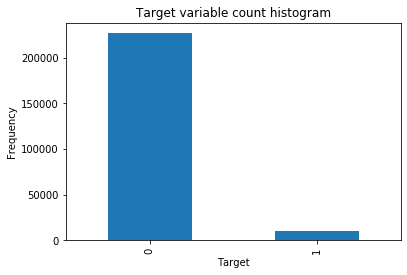

In [558]:
pd.value_counts(y).plot.bar()
plt.title('Target variable count histogram')
plt.xlabel('Target')
plt.ylabel('Frequency')
y.value_counts()

In [383]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 5)]

In [384]:
n_estimators

[100, 144, 188, 233, 277, 322, 366, 411, 455, 500]

In [386]:
max_depth

[3, 4, 6, 8, 10]

In [226]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1],
        'gamma': [0.5, 1, 1.5, 2],
        'subsample': [0.5, 0.8, 1.0],
        'colsample_bytree': [0.5, 0.8, 1.0],
        'max_depth': max_depth,
        'eta': [0.01, 0.05, 0.1, 0.2],
        'n_estimators' : n_estimators,
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
        }

In [385]:
xgb = XGBClassifier(objective='binary:logistic',
                    silent=True, n_jobs=1)

In [387]:
folds = 3
param_comb = 1

In [559]:
sm = SMOTE(random_state=2)
X_SMOTE, y_SMOTE = sm.fit_sample(OH_X_train, y)

In [560]:
X_SMOTE.shape

(453494, 27)

In [561]:
X_SMOTE=pd.DataFrame(data=X_SMOTE[0:,0:],index=[i for i in range(X_SMOTE.shape[0])],columns=OH_X_train.columns)

In [562]:
random_search_smote = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=1, cv=3, verbose=5, random_state=1001 )
random_search_smote.fit(X_SMOTE, y_SMOTE)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8, score=0.836, total= 2.1min
[CV] subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8, score=0.915, total= 2.3min
[CV] subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.4min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8, score=0.898, total= 1.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1.0],
                                        'eta': [0.01, 0.05, 0.1, 0.2],
                                        'gamma': [0.5, 1, 1.5, 2],
       

In [563]:
print('\n All results:')
print(random_search_smote.cv_results_)
print('\n Best Score')
print(random_search_smote.best_score_)
print('\n Best estimator:')
print(random_search_smote.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search_smote.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search_smote.best_params_)
results_smote = pd.DataFrame(random_search_smote.cv_results_)
results_smote.head(5)


 All results:
{'mean_fit_time': array([119.51670051]), 'std_fit_time': array([17.52197449]), 'mean_score_time': array([1.25175285]), 'std_score_time': array([0.16169315]), 'param_subsample': masked_array(data=[0.5],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[144],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_eta': masked_array(data=[0.1],
             mask=[False],
       fill_value='?',
         

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,119.516701,17.521974,1.251753,0.161693,0.5,144,1,6,0.1,1,0.1,0.8,"{'subsample': 0.5, 'n_estimators': 144, 'min_c...",0.835627,0.914868,0.898054,0.882849,0.03409,1


In [564]:
len(X_SMOTE.columns)
# All categorical columns
print([col for col in X_SMOTE.columns if X_SMOTE[col].dtype == "object"])
X_SMOTE.head()

[]


,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,...,category_1_was_missing,category_2_was_missing,category_3_was_missing,product_type_was_missing,0,1,2,3,4,5
0,87862.0,422.0,0.0,190710.0,43886.0,2350.0,11.0,35.0,20.0,5622.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,63410.0,467.0,1.0,356854.0,43209.0,3421.0,4.0,74.0,292.0,577.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,71748.0,259.0,1.0,658178.0,122348.0,973.0,13.0,67.0,170.0,2874.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,69209.0,244.0,1.0,943856.0,53195.0,3008.0,11.0,51.0,220.0,8557.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,62873.0,473.0,0.0,342525.0,32155.0,3187.0,9.0,9.0,244.0,10412.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [566]:
OH_X_test = OH_X_test*1
OH_X_test = OH_X_test.apply(pd.to_numeric)

In [567]:
y_test = random_search_smote.predict_proba(OH_X_test)
results_df = pd.DataFrame(data={'impression_id':testDF['impression_id'], 'is_click':y_test[:,1]})
print(results_df.shape)
results_df.to_csv('/Users/raghugup/Downloads/submission_format-111.csv', index=False)

(90675, 2)


In [570]:
# Get the best parameters
random_search_params_smote = results_smote.loc[0, 'params']
xgb_best_smote = XGBClassifier(**random_search_params_smote, objective='binary:logistic',
                    silent=True, n_jobs=5)
xgb_best_smote.fit(X_SMOTE, y_SMOTE)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=144, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.5, verbosity=1)

[0.00378539 0.02592778 0.13192548 0.00365604 0.00377955 0.00421043
 0.01365715 0.0072003  0.00465748 0.00378918 0.1016825  0.23342368
 0.00721512 0.05466194 0.         0.         0.00173219 0.00214516
 0.         0.         0.         0.0666731  0.29868203 0.03119554
 0.         0.         0.        ]
[('user_id', 0.0037853858), ('app_code', 0.025927778), ('is_4G', 0.13192548), ('session_id', 0.003656042), ('item_id', 0.0037795529), ('item_price', 0.004210427), ('category_1', 0.013657145), ('category_2', 0.0072003035), ('category_3', 0.0046574785), ('product_type', 0.0037891844), ('serve_month', 0.1016825), ('impression_month', 0.23342368), ('serve_day', 0.0072151218), ('impression_day', 0.054661945), ('serve_year', 0.0), ('impression_year', 0.0), ('item_price_was_missing', 0.0017321926), ('category_1_was_missing', 0.0021451567), ('category_2_was_missing', 0.0), ('category_3_was_missing', 0.0), ('product_type_was_missing', 0.0), (0, 0.0666731), (1, 0.29868203), (2, 0.031195544), (3, 0.

Text(0.5, 0, 'relative importance')

<Figure size 432x288 with 0 Axes>

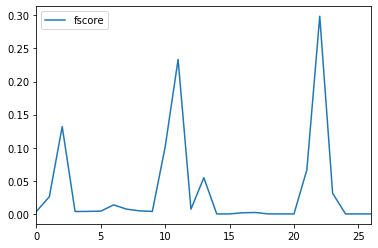

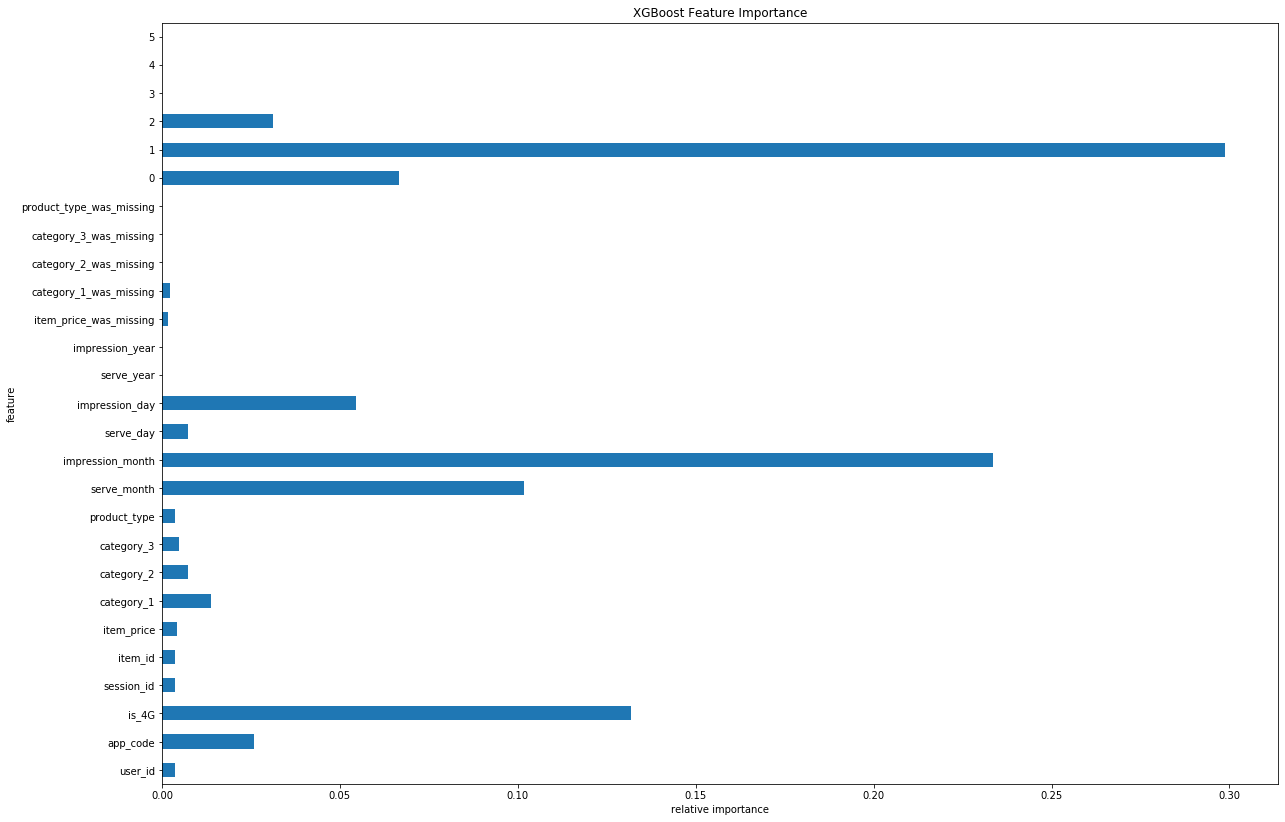

In [571]:
# feature importance
print(xgb_best_smote.feature_importances_)
featureTuples = []
i = 0
for col in OH_X_train.columns:
    featureTuples.append((col, xgb_best_smote.feature_importances_[i]))
    i = i + 1
print(featureTuples)
df = pd.DataFrame(featureTuples, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(20, 14))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

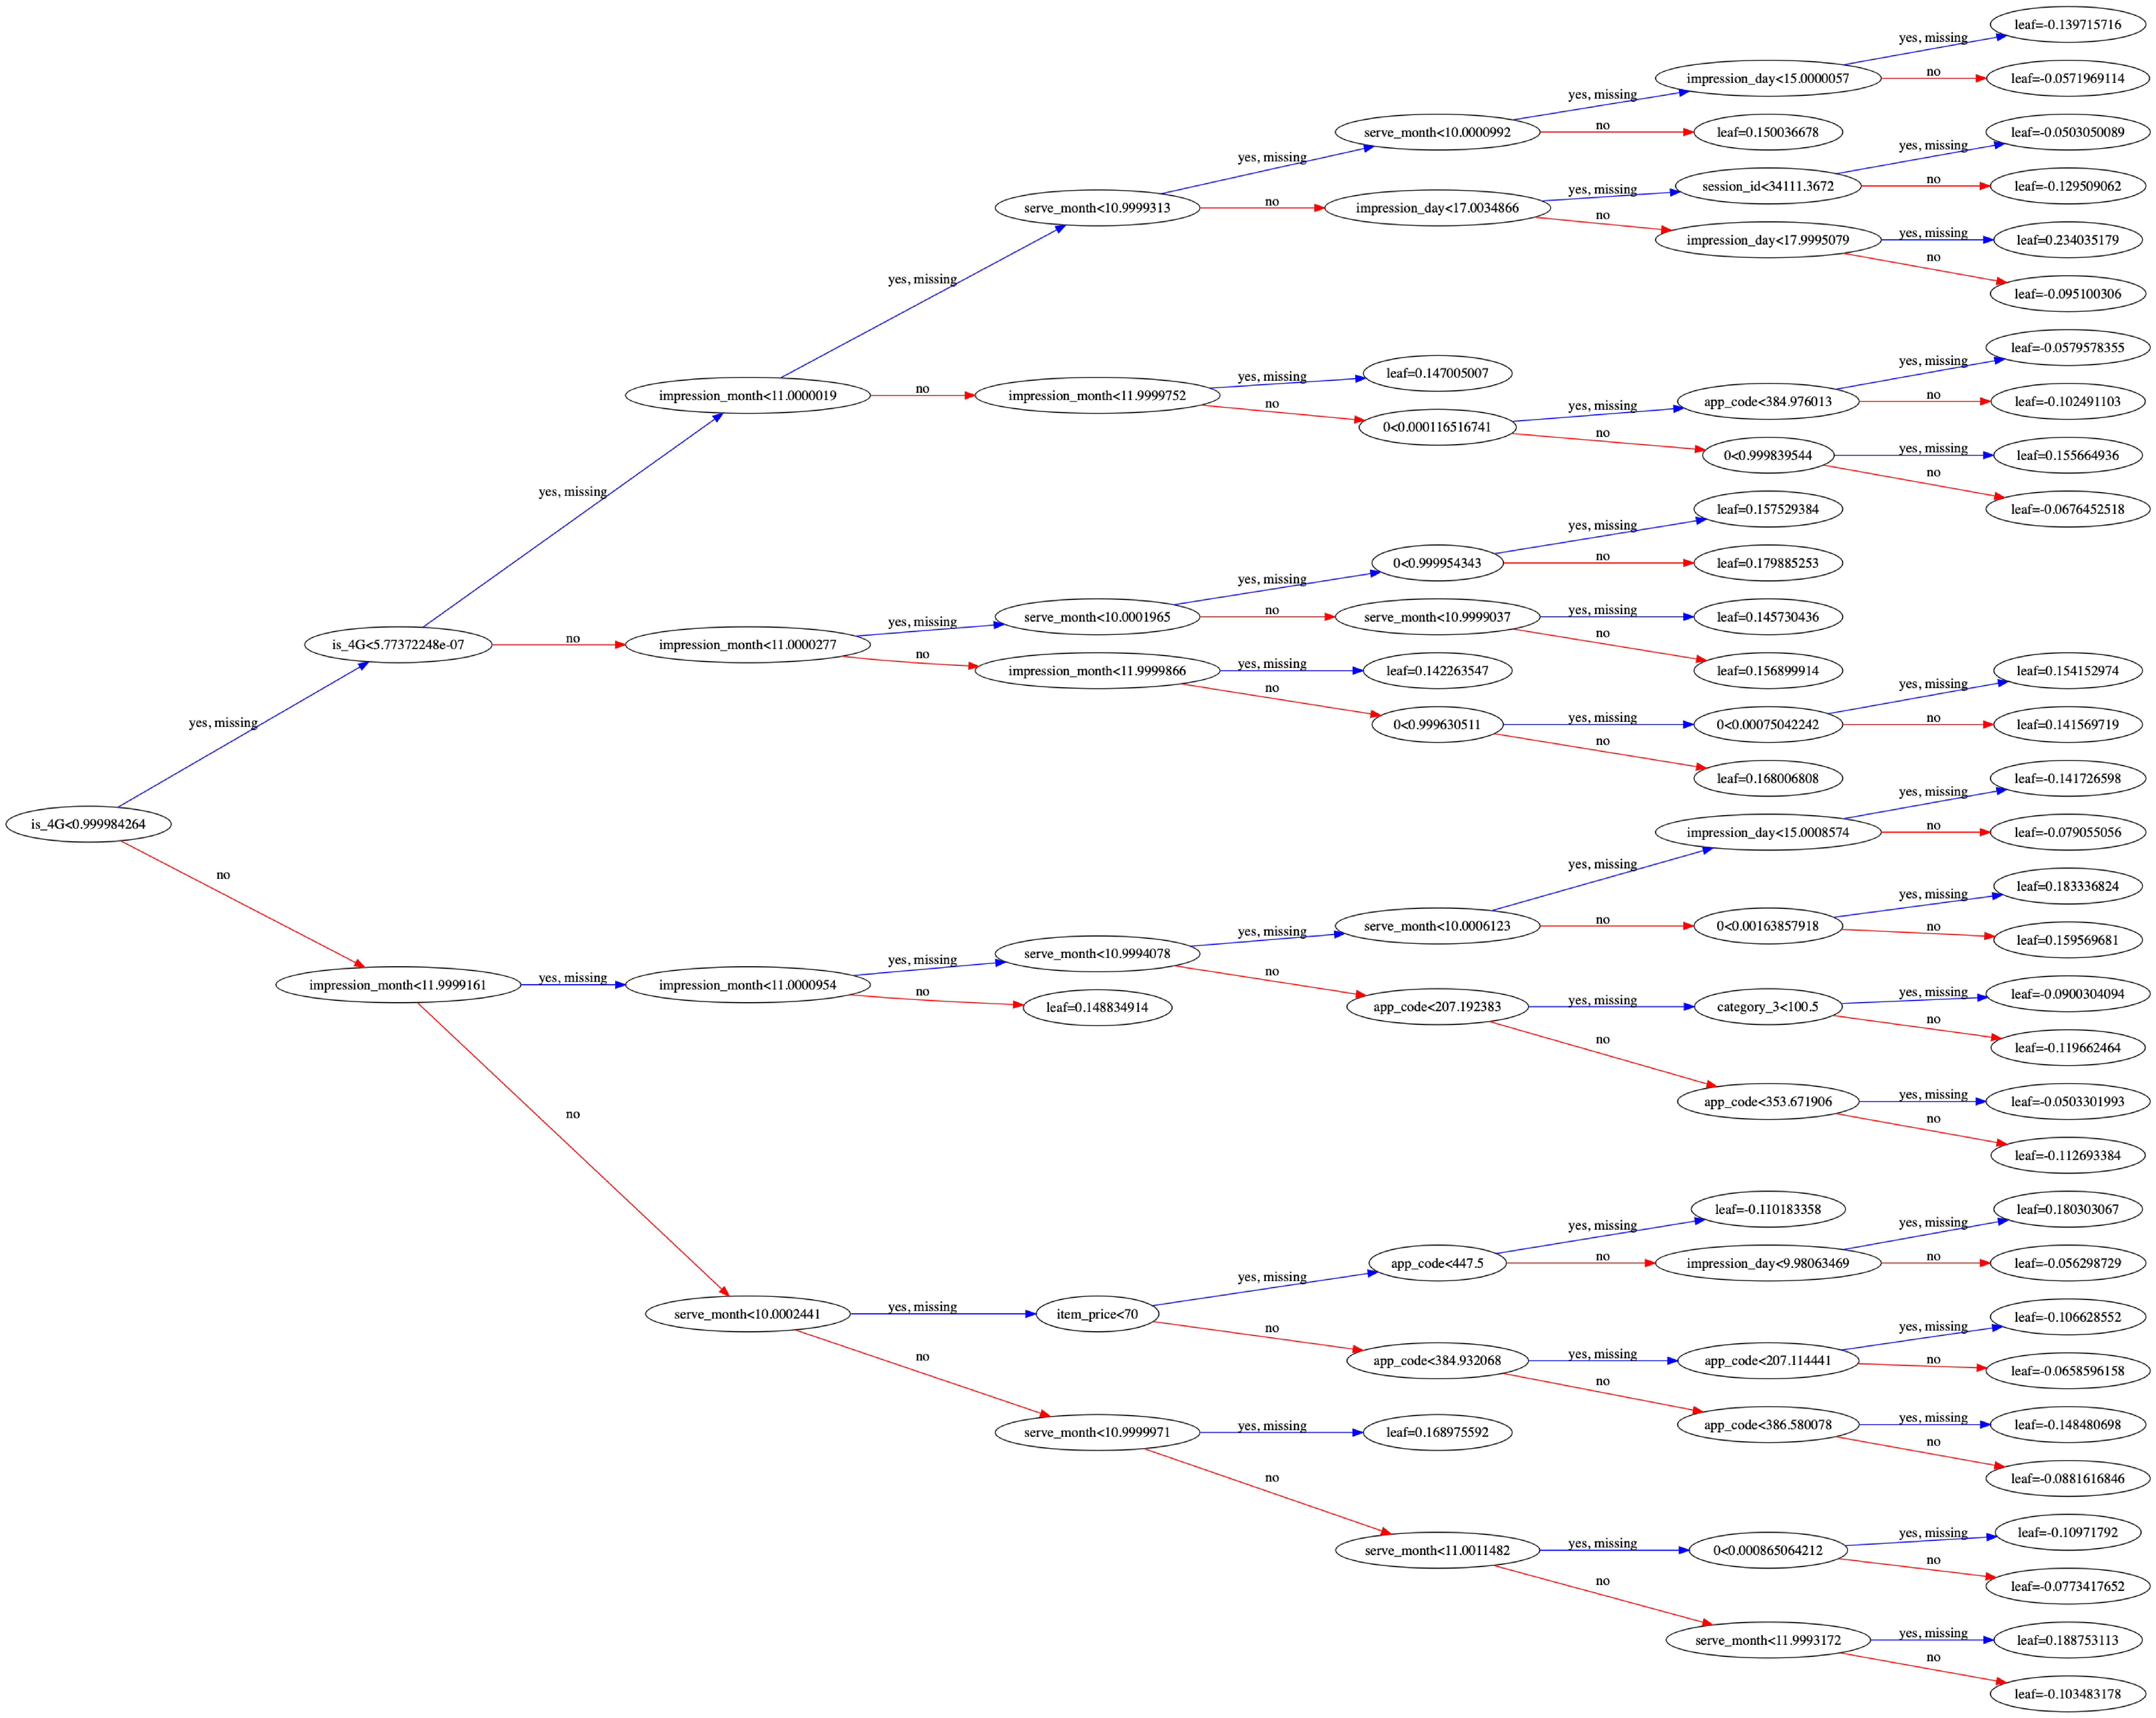

In [572]:
#print 5th boosted tree
plot_tree(xgb_best_smote, num_trees= 5, rankdir='LR')
# plt.savefig("/Users/raghugup/Downloads/xgb_best.png", format='png', dpi=2000)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('/Users/raghugup/Downloads/tree.png')